In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\Assignment 11\\Fraud_check (1).csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.shape

(600, 6)

In [8]:
df1 = df.drop(['City.Population'], axis = 1)
df1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [9]:
y1=np.empty(600, dtype=object)
i=0

for value in df1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1    

In [10]:
df2=pd.DataFrame(y1,columns=['Target'])
df2

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [11]:
df3 = pd.concat([df1,df2],axis=1)
df3.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [13]:
df3.describe()

,Taxable.Income,Work.Experience
count,600.000000,600.000000
mean,55208.375000,15.558333
std,26204.827597,8.842147
min,10003.000000,0.000000
25%,32871.500000,8.000000
50%,55074.500000,15.000000
75%,78611.750000,24.000000
max,99619.000000,30.000000


In [14]:
df3.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [15]:
df3.shape

(600, 6)

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

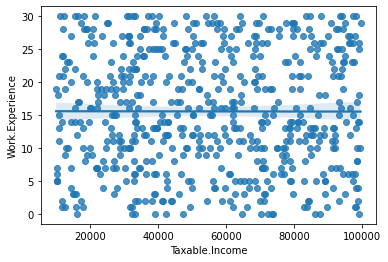

In [25]:
sns.regplot('Taxable.Income','Work.Experience', data=df3)  

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

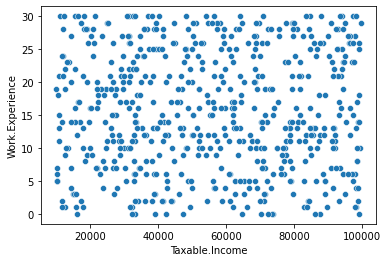

In [24]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data =df3)

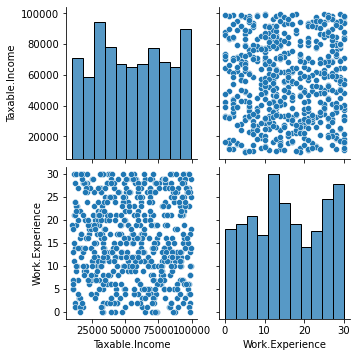

In [18]:
sns.pairplot(df3)

<AxesSubplot:>

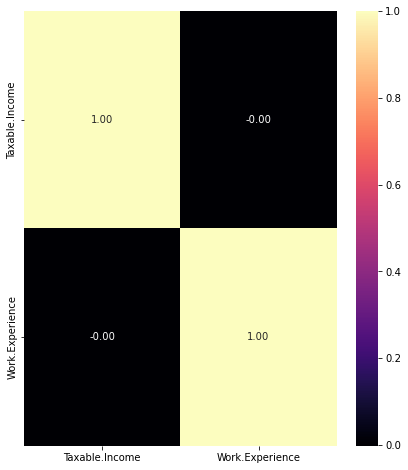

In [19]:
plt.figure(figsize = (7, 8));
sns.heatmap(df3.corr(), cmap='magma', annot=True, fmt=".2f")

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

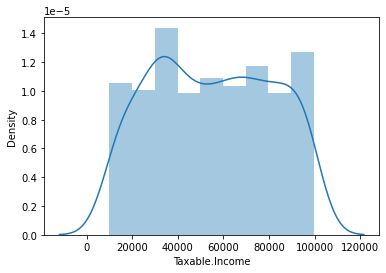

In [31]:
sns.distplot(df3['Taxable.Income'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

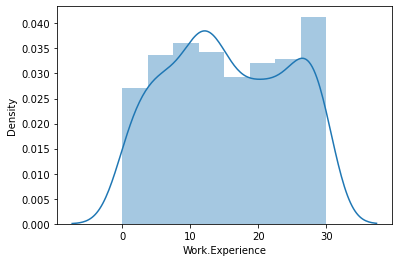

In [33]:
sns.distplot(df3['Work.Experience'])

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

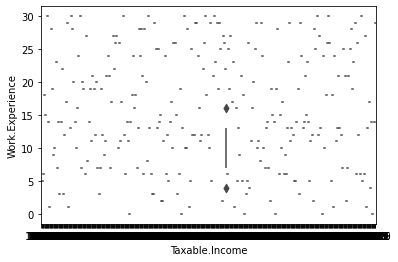

In [40]:
sns.boxenplot(x = 'Taxable.Income', y = 'Work.Experience', data = df3)

In [34]:
label_encoder = preprocessing.LabelEncoder()
df3['Undergrad']= label_encoder.fit_transform(df3['Undergrad']) 
df3['Marital.Status']= label_encoder.fit_transform(df3['Marital.Status']) 
df3['Urban']= label_encoder.fit_transform(df3['Urban']) 
df3['Target']= label_encoder.fit_transform(df3['Target'])

In [35]:
df4=df3

In [36]:
x=df3.iloc[:,0:5]
y=df3[['Target']]
x.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


In [37]:
kfold = KFold(n_splits=8, random_state=27, shuffle=True)
model2 = RandomForestClassifier(n_estimators=85, max_features=5)

In [38]:
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())

0.9983333333333333
